In [2]:
!pip install pybinding


# Animação para os angulos magicos
## Criar a primeira rede do Grafeno

In [3]:
import math
import numpy as np
import pybinding as pb
import matplotlib.pyplot as plt
from pybinding.repository import graphene
from matplotlib.animation import FuncAnimation


#pb.pltutils.use_style()
#Colormaps: https://matplotlib.org/stable/users/explain/colors/colormaps.html
    

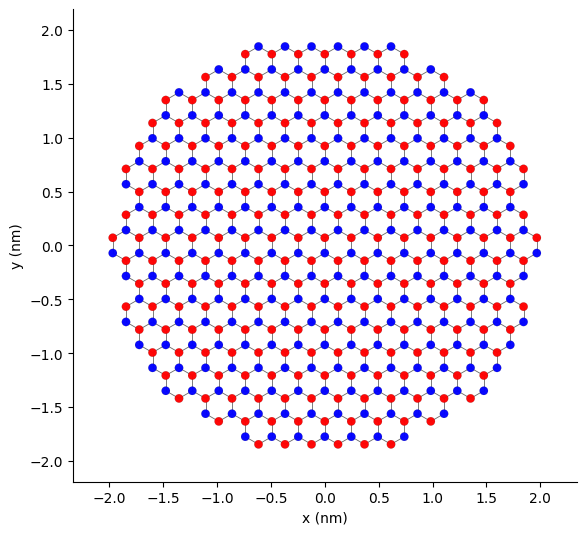

In [4]:
# Crie uma rede de grafeno
model1 = pb.Model(
    graphene.monolayer(),
    pb.circle(radius=2)  # Defina o raio do círculo desejado
)

# Plote o modelo
plt.figure(figsize=(6.5, 6.5))
#model1.plot(site={ 'cmap': 'YlGnBu'})
model1.plot(site={ 'cmap': 'bwr'}) 
# Exiba o gráfico
plt.show()


## Criar a segunda rede do Grafeno

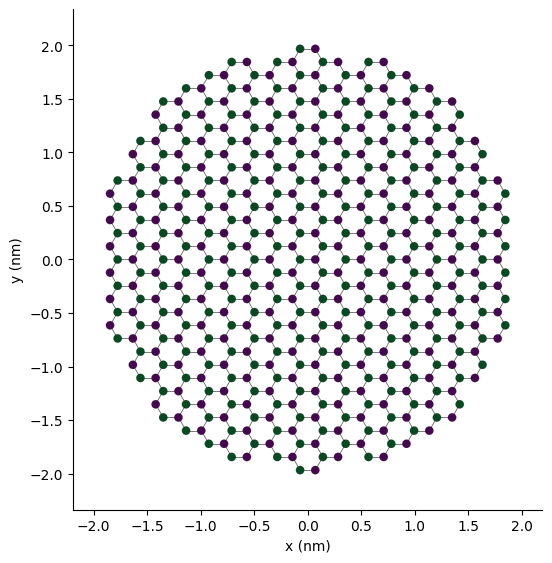

In [5]:

# Defina a função de rotação

@pb.site_position_modifier
def rotate(x, y, z):
    angle = math.radians(angulo)  #np.pi / 4  # Ângulo de rotação em radianos (45 graus)
    x_rotated = x * np.cos(angle) - y * np.sin(angle)
    y_rotated = x * np.sin(angle) + y * np.cos(angle)
    return x_rotated, y_rotated, z

# Crie uma rede de grafeno rotacionada
angulo=90

model2 = pb.Model(
    graphene.monolayer(),
    pb.circle(radius=2),  # Defina o raio do círculo desejado
    rotate  # Aplique a função de rotação ao modelo
)

# Plote o modelo
plt.figure(figsize=(6.5, 6.5))
#model2.plot(site={ 'cmap': 'RdPu'})
model2.plot(site={ 'cmap': 'PRGn'})
 
# Exiba o gráfico
plt.show()



# Comparando as duas Redes

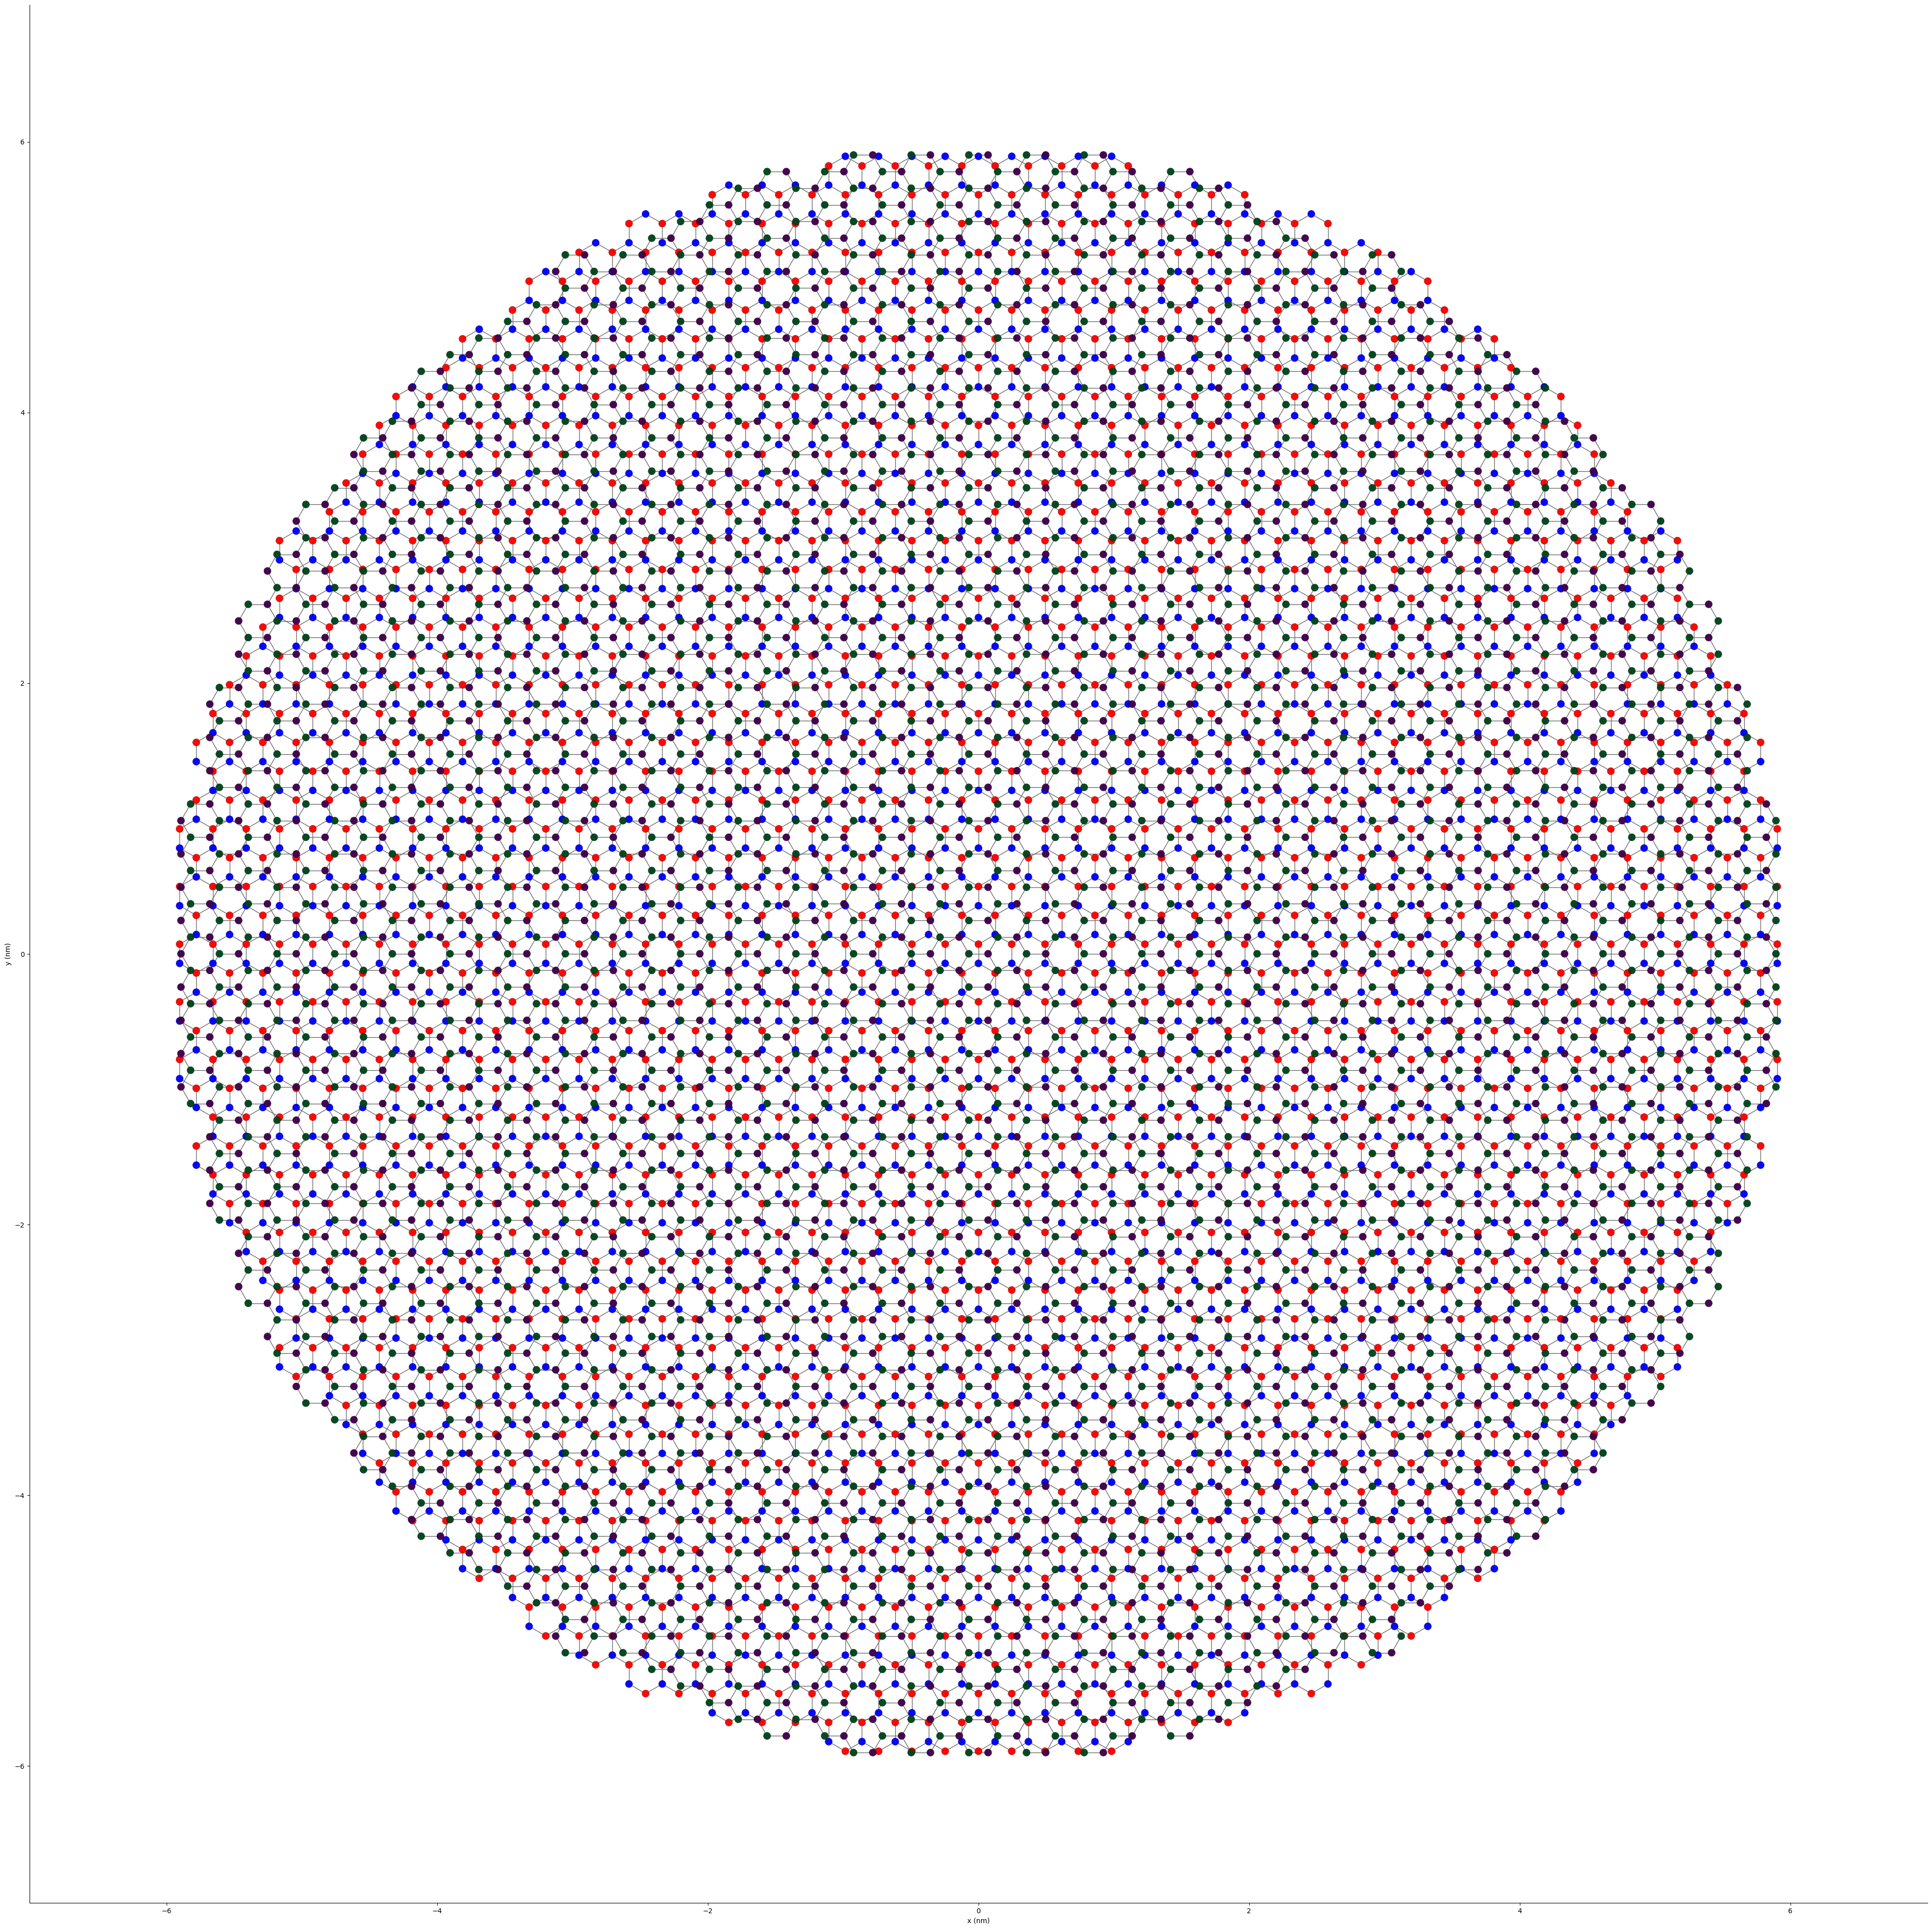

In [13]:

r=6

model1 = pb.Model(
    graphene.monolayer(),
    pb.circle(radius=r)  # Defina o raio do círculo desejado
)

angulo=90
model2 = pb.Model(
    graphene.monolayer(),
    pb.circle(radius=r),  # Defina o raio do círculo desejado
    rotate  # Aplique a função de rotação ao modelo
)

plt.figure(figsize=(50, 50))
model1.plot(site={ 'cmap': 'bwr'})
model2.plot(site={ 'cmap': 'PRGn'})
 
plt.show()

In [ ]:
raio=6

# Função para criar o modelo com a rotação
def create_rotated_model(angle):
    @pb.site_position_modifier
    def rotate(x, y, z):
        angle_rad = math.radians(angle)
        x_rotated = x * np.cos(angle_rad) - y * np.sin(angle_rad)
        y_rotated = x * np.sin(angle_rad) + y * np.cos(angle_rad)
        return x_rotated, y_rotated, z

    model = pb.Model(
        graphene.monolayer(),
        pb.circle(radius=raio),
        rotate
    )
    return model

# Declaração do modelo sem a rotação
model1 = pb.Model(
    graphene.monolayer(),
    pb.circle(radius=raio)  # Defina o raio do círculo desejado
)

# Função para atualizar o gráfico com o modelo atual
def update(frame):
    plt.clf()
    angle = frame# * 2  # Ajuste a velocidade da animação alterando o valor multiplicador
    model2 = create_rotated_model(angle)  #atualiza o angulo
    model1.plot(site={'cmap': 'PiYG'})
    model2.plot(site={'cmap': 'RdBu'})
   # Limites dos eixos X e Y fixos
    plt.xlim(-2.2, 2.2)   
    plt.ylim(-2.2, 2.2)   
    
    plt.title(f'Ângulo de Rotação: {angle} graus') # Titulo do grafico

# Configurações da animação
fig = plt.figure(figsize=(600, 600))
ani = FuncAnimation(fig, update, frames=np.arange(0, 8), interval=1000)  # 0 a 180 graus, intervalo de 50 ms

# Salvar a animação em um arquivo
ani.save('grafeno_rotating.mp4', writer='ffmpeg', fps=1)

#plt.show()


### Parâmetros da criação do video 

1. **`ani = FuncAnimation(fig, update, frames=np.arange(0, 181), interval=50)`**:

   - `FuncAnimation`: É uma classe do Matplotlib usada para criar animações.
   - `fig`: É a figura na qual a animação será desenhada.
   - `update`: É a função que será chamada em cada quadro da animação.
   - `frames=np.arange(0, 181)`: Especifica os quadros da animação. Neste caso, ele varia de 0 a 180 graus, criando uma animação que percorre esses valores.
   - `interval=50`: Define o intervalo entre os quadros em milissegundos. Neste caso, cada quadro terá um intervalo de 50 ms.

2. **`ani.save('grafeno_rotating.gif', writer='pillow', fps=10)`**:

   - `ani.save`: Salva a animação como um arquivo.
   - `'grafeno_rotating.gif'`: Nome do arquivo de saída, neste caso, um arquivo GIF.
   - `writer='pillow'`: Especifica o mecanismo de gravação a ser usado. Neste caso, está usando o mecanismo 'pillow', que é um conjunto de bibliotecas para manipulação de imagens.
   - `fps=10`: Especifica os quadros por segundo na animação. Neste caso, a animação terá 10 quadros por segundo.

Estas linhas criam uma animação utilizando a função `update` em cada quadro, onde o ângulo de rotação varia de 0 a 180 graus, com um intervalo de 50 ms entre os quadros. A animação resultante é então salva como um arquivo GIF chamado 'grafeno_rotating.gif'.

O parâmetro `writer` no método `ani.save` do Matplotlib especifica o mecanismo de gravação a ser usado para criar o arquivo de animação. A opção escolhida depende do tipo de arquivo que você deseja gerar.

1. **'ffmpeg'**:
   - Requer que o FFmpeg esteja instalado no seu sistema.
   - Pode ser usado para salvar animações em vários formatos de vídeo, como MP4.

   ```python
   ani.save('animation.mp4', writer='ffmpeg', fps=10)
   ```

2. **'pillow'**:
   - Usa a biblioteca Pillow (um fork da PIL - Python Imaging Library).
   - Adequado para salvar animações como GIF, que suporta várias imagens em um único arquivo.

   ```python
   ani.save('animation.gif', writer='pillow', fps=10)
   ```

3. **'imagemagick'**:
   - Usa o ImageMagick para salvar a animação.
   - Pode ser usado para salvar animações em vários formatos, incluindo GIF.

   ```python
   ani.save('animation.gif', writer='imagemagick', fps=10)
   ```

4. **'html'**:
   - Cria uma animação embutida em HTML.
   - Pode ser útil se você quiser incorporar a animação em uma página da web.

   ```python
   ani.save('animation.html', writer='html', fps=10)
   ```
 

In [ ]:
#Limpar os dados da pasta

import os
def remove_folder_contents(folder):
    for the_file in os.listdir(folder):
        file_path = os.path.join(folder, the_file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                remove_folder_contents(file_path)
                os.rmdir(file_path)
        except Exception as e:
            print(e)

folder_path = '/kaggle/working'
remove_folder_contents(folder_path)
